In [41]:
import pandas as pd

In [42]:
import requests
from requests.auth import HTTPBasicAuth
auth = HTTPBasicAuth('elastic', 'AWbtmGda2Q7BI2bYpdjyF4qd')
url = 'https://8f9677360fc34e2eb943d737b2597c7b.us-east-1.aws.found.io:9243/brasov-dev/_search?size=100000&q=*&sort=TimeStamp:desc'


In [43]:
response = requests.get(url=url, auth=auth)

In [44]:
response

<Response [200]>

In [45]:
import json
data = json.loads(response.text)

In [46]:
data

{'took': 2366,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': [{'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'QTLhLIAB3mQrnl8XS7_w',
    '_score': None,
    '_source': {'Source': 'Waqi',
     'Sensor': 'pm10',
     'Value': 2,
     'LocationLat': 45.6598333,
     'LocationLong': 25.6144883,
     'TimeStamp': 1650020400000,
     'Measurement': 'µg/m3'},
    'sort': [1650020400000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'QjLhLIAB3mQrnl8XS7_y',
    '_score': None,
    '_source': {'Source': 'Waqi',
     'Sensor': 'so2',
     'Value': 2.6,
     'LocationLat': 45.6542706,
     'LocationLong': 25.6240614,
     'TimeStamp': 1650020400000,
     'Measurement': 'µg/m3'},
    'sort': [1650020400000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'QzLhLIAB3mQrnl8XS7_1',
    '_score': None,
    '_source': {'Source': 'Waqi'

In [47]:
from pandas import json_normalize
dataframe = json_normalize(data['hits']['hits'])

In [48]:
dataframe

,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
0,brasov-dev,_doc,QTLhLIAB3mQrnl8XS7_w,None,[1650020400000],Waqi,pm10,2.0,45.659833,25.614488,1650020400000,µg/m3
1,brasov-dev,_doc,QjLhLIAB3mQrnl8XS7_y,None,[1650020400000],Waqi,so2,2.6,45.654271,25.624061,1650020400000,µg/m3
2,brasov-dev,_doc,QzLhLIAB3mQrnl8XS7_1,None,[1650020400000],Waqi,pm10,14.0,45.654271,25.624061,1650020400000,µg/m3
3,brasov-dev,_doc,RDLhLIAB3mQrnl8XS7_2,None,[1650020400000],Waqi,no2,8.0,45.654271,25.624061,1650020400000,µg/m3
4,brasov-dev,_doc,RjLhLIAB3mQrnl8XTL-G,None,[1650020400000],Waqi,no2,15.3,45.649117,25.604136,1650020400000,µg/m3
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,brasov-dev,_doc,3T90KX8Bwa_bL2zR7CTQ,None,[1645667988000],UradMonitor,pm10,13.0,45.657148,25.563752,1645667988000,µg/m3
99996,brasov-dev,_doc,3j90KX8Bwa_bL2zR7CTT,None,[1645667988000],UradMonitor,pm25,12.0,45.657148,25.563752,1645667988000,µg/m3
99997,brasov-dev,_doc,3z90KX8Bwa_bL2zR7SQL,None,[1645667988000],UradMonitor,cho2,7.0,45.657148,25.563752,1645667988000,µg/m3
99998,brasov-dev,_doc,4D90KX8Bwa_bL2zR7SQN,None,[1645667988000],UradMonitor,co2,655.0,45.657148,25.563752,1645667988000,µg/m3


In [49]:
dataframe_size = len(dataframe.index)
dataframe_size

100000

<AxesSubplot:>

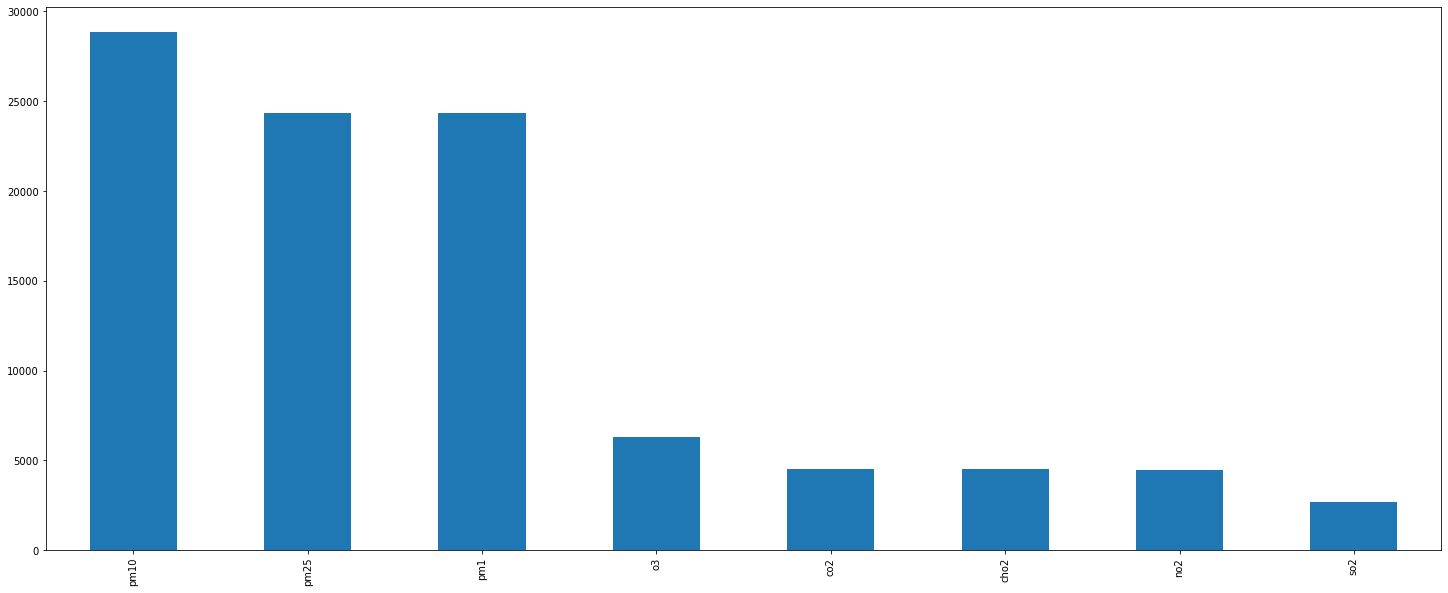

In [50]:
import matplotlib.pyplot as plt
hist_sensor = plt.figure(figsize = (25,10))
ax = hist_sensor.gca()

dataframe.get('_source.Sensor').value_counts().plot(kind='bar')

In [51]:
dataframe['LocationId'] = dataframe['_source.LocationLat']*10000000 + dataframe['_source.LocationLong']*10000000
dataframe['LocationName'] = ""
dataframe.loc[dataframe['LocationId'] == 712668900.0, 'LocationName'] = 'Toamnei' 
dataframe.loc[dataframe['LocationId'] == 712196290.0, 'LocationName'] = 'Carierei'
dataframe.loc[dataframe['LocationId'] == 712209000.0, 'LocationName'] = 'Brintex'
dataframe.loc[dataframe['LocationId'] == 712240750.0, 'LocationName'] = 'Avantgarden'
dataframe.loc[dataframe['LocationId'] == 708361730.0, 'LocationName'] = 'Bucegi'
dataframe.loc[dataframe['LocationId'] == 712682018.0, 'LocationName'] = 'Carrefour'
dataframe.loc[dataframe['LocationId'] == 712307300.0, 'LocationName'] = 'Centru'
dataframe.loc[dataframe['LocationId'] == 712422000.0, 'LocationName'] = 'Cetatuie'
dataframe.loc[dataframe['LocationId'] == 712485560.0, 'LocationName'] = 'Basarab'
dataframe.loc[dataframe['LocationId'] == 712532529.0, 'LocationName'] = 'Patria'
dataframe.loc[dataframe['LocationId'] == 711435090.0, 'LocationName'] = 'Codlea1'
dataframe.loc[dataframe['LocationId'] == 711587690.0, 'LocationName'] = 'Codlea2'
dataframe.loc[dataframe['LocationId'] == 712526000.0, 'LocationName'] = 'Colina1'
dataframe.loc[dataframe['LocationId'] == 712485000.0, 'LocationName'] = 'Colina2'
dataframe.loc[dataframe['LocationId'] == 711054930.0, 'LocationName'] = 'Cristian'
dataframe.loc[dataframe['LocationId'] == 712743216.0, 'LocationName'] = 'Gara'
dataframe.loc[dataframe['LocationId'] == 713825580.0, 'LocationName'] = 'Harman1'
dataframe.loc[dataframe['LocationId'] == 714030800.0, 'LocationName'] = 'Harman2'
dataframe.loc[dataframe['LocationId'] == 712560910.0, 'LocationName'] = 'Racadau'
dataframe.loc[dataframe['LocationId'] == 710537170.0, 'LocationName'] = 'Rasnov'
dataframe.loc[dataframe['LocationId'] == 713449870.0, 'LocationName'] = 'Sanpetru1'
dataframe.loc[dataframe['LocationId'] == 713500000.0, 'LocationName'] = 'Sanpetru2'
dataframe.loc[dataframe['LocationId'] == 712475170.0, 'LocationName'] = 'Saturn'
dataframe.loc[dataframe['LocationId'] == 712500331.0, 'LocationName'] = 'Stupini1'
dataframe.loc[dataframe['LocationId'] == 712571580.0, 'LocationName'] = 'Stupini2'
dataframe.loc[dataframe['LocationId'] == 712804610.0, 'LocationName'] = 'Tractorul'
dataframe.loc[dataframe['LocationId'] == 713218270.0, 'LocationName'] = 'TriajH'
dataframe.loc[dataframe['LocationId'] == 712783320.0, 'LocationName'] = 'Vlahuta1'
dataframe.loc[dataframe['LocationId'] == 712797770.0, 'LocationName'] = 'Vlahuta2'
dataframe.loc[dataframe['LocationId'] == 708839110.0, 'LocationName'] = 'Zarnesti'
dataframe.loc[dataframe['LocationId'] == 712247880.0, 'LocationName'] = 'Saguna'
dataframe.loc[dataframe['LocationId'] == 712352710.0, 'LocationName'] = 'Livada'
dataframe.head(10)

,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
0,brasov-dev,_doc,QTLhLIAB3mQrnl8XS7_w,None,[1650020400000],Waqi,pm10,2.0,45.659833,25.614488,1650020400000,µg/m3,712743216.0,Gara
1,brasov-dev,_doc,QjLhLIAB3mQrnl8XS7_y,None,[1650020400000],Waqi,so2,2.6,45.654271,25.624061,1650020400000,µg/m3,712783320.0,Vlahuta1
2,brasov-dev,_doc,QzLhLIAB3mQrnl8XS7_1,None,[1650020400000],Waqi,pm10,14.0,45.654271,25.624061,1650020400000,µg/m3,712783320.0,Vlahuta1
3,brasov-dev,_doc,RDLhLIAB3mQrnl8XS7_2,None,[1650020400000],Waqi,no2,8.0,45.654271,25.624061,1650020400000,µg/m3,712783320.0,Vlahuta1
4,brasov-dev,_doc,RjLhLIAB3mQrnl8XTL-G,None,[1650020400000],Waqi,no2,15.3,45.649117,25.604136,1650020400000,µg/m3,712532529.0,Patria
5,brasov-dev,_doc,RzLhLIAB3mQrnl8XTL-I,None,[1650020400000],Waqi,pm10,16.0,45.716700,25.633300,1650020400000,µg/m3,713500000.0,Sanpetru2
6,brasov-dev,_doc,NjLhLIAB3mQrnl8XS7-c,None,[1650020400000],Waqi,so2,2.7,45.716700,25.633300,1650020400000,µg/m3,713500000.0,Sanpetru2
7,brasov-dev,_doc,ODLhLIAB3mQrnl8XS7-f,None,[1650020400000],Waqi,o3,59.8,45.716700,25.633300,1650020400000,µg/m3,713500000.0,Sanpetru2
8,brasov-dev,_doc,OTLhLIAB3mQrnl8XS7-f,None,[1650020400000],Waqi,no2,4.1,45.716700,25.633300,1650020400000,µg/m3,713500000.0,Sanpetru2
9,brasov-dev,_doc,OzLhLIAB3mQrnl8XS7_h,None,[1650020400000],Waqi,pm10,14.0,45.634330,25.633872,1650020400000,µg/m3,712682018.0,Carrefour


In [52]:
# dataframe.groupby(['LocationName']).size().reset_index().rename(columns={0:'count'})

<AxesSubplot:>

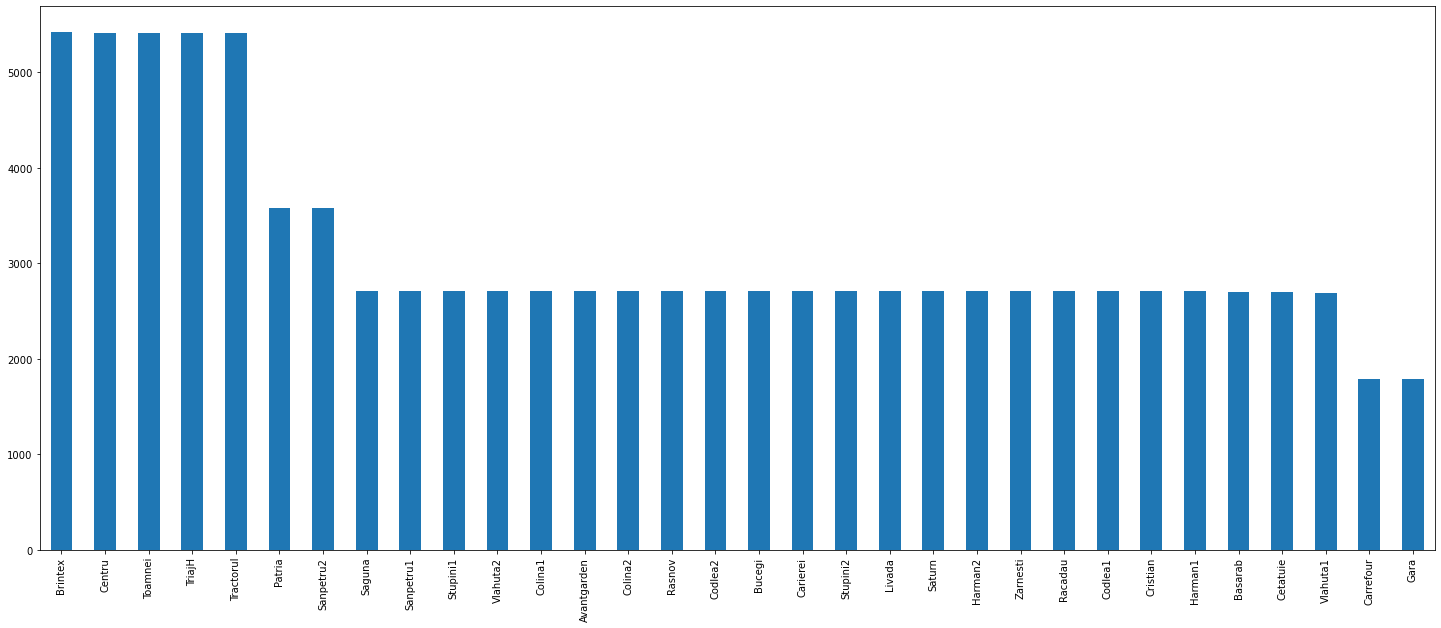

In [53]:
# hist_location = dataframe.get('LocationName').hist()
import matplotlib.pyplot as plt
hist_location = plt.figure(figsize = (25,10))
ax = hist_location.gca()
# dataframe.get('LocationName').hist(ax = ax)

dataframe.get('LocationName').value_counts().plot(kind='bar')
# dataframe.get('LocationName').value_counts(sort=False).plot.bar(rot=0)

In [54]:
dataframe_v2 = dataframe[[i for i in list(dataframe.columns) if i != '_index']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != '_type']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != '_id']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != '_score']]
dataframe_v2 = dataframe_v2[[i for i in list(dataframe_v2.columns) if i != 'sort']]
dataframe_v2.tail(7)
# dataframe_v2

,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
99993,UradMonitor,o3,20.0,45.657148,25.563752,1645667988000,µg/m3,712209000.0,Brintex
99994,UradMonitor,pm1,9.0,45.657148,25.563752,1645667988000,µg/m3,712209000.0,Brintex
99995,UradMonitor,pm10,13.0,45.657148,25.563752,1645667988000,µg/m3,712209000.0,Brintex
99996,UradMonitor,pm25,12.0,45.657148,25.563752,1645667988000,µg/m3,712209000.0,Brintex
99997,UradMonitor,cho2,7.0,45.657148,25.563752,1645667988000,µg/m3,712209000.0,Brintex
99998,UradMonitor,co2,655.0,45.657148,25.563752,1645667988000,µg/m3,712209000.0,Brintex
99999,UradMonitor,pm25,12.0,45.653509,25.566120,1645667986000,µg/m3,712196290.0,Carierei


In [55]:
cho2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'cho2']
co2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'co2']
no2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'no2']
o3 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'o3']
pm1 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'pm1']
pm10 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'pm10']
pm25 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'pm25']
so2 = dataframe_v2[dataframe_v2.get('_source.Sensor') == 'so2']

In [56]:
print('Lungime dataframe: ',len(dataframe_v2))
print('Lungime dataframe cho2: ',len(cho2))
print('Lungime dataframe co2: ',len(co2))
print('Lungime dataframe no2: ',len(no2))
print('Lungime dataframe o3: ',len(o3))
print('Lungime dataframe pm1: ',len(pm1))
print('Lungime dataframe pm10: ',len(pm10))
print('Lungime dataframe pm25: ',len(pm25))
print('Lungime dataframe so2: ',len(so2))

Lungime dataframe:  100000
Lungime dataframe cho2:  4508
Lungime dataframe co2:  4511
Lungime dataframe no2:  4478
Lungime dataframe o3:  6299
Lungime dataframe pm1:  24344
Lungime dataframe pm10:  28827
Lungime dataframe pm25:  24347
Lungime dataframe so2:  2686


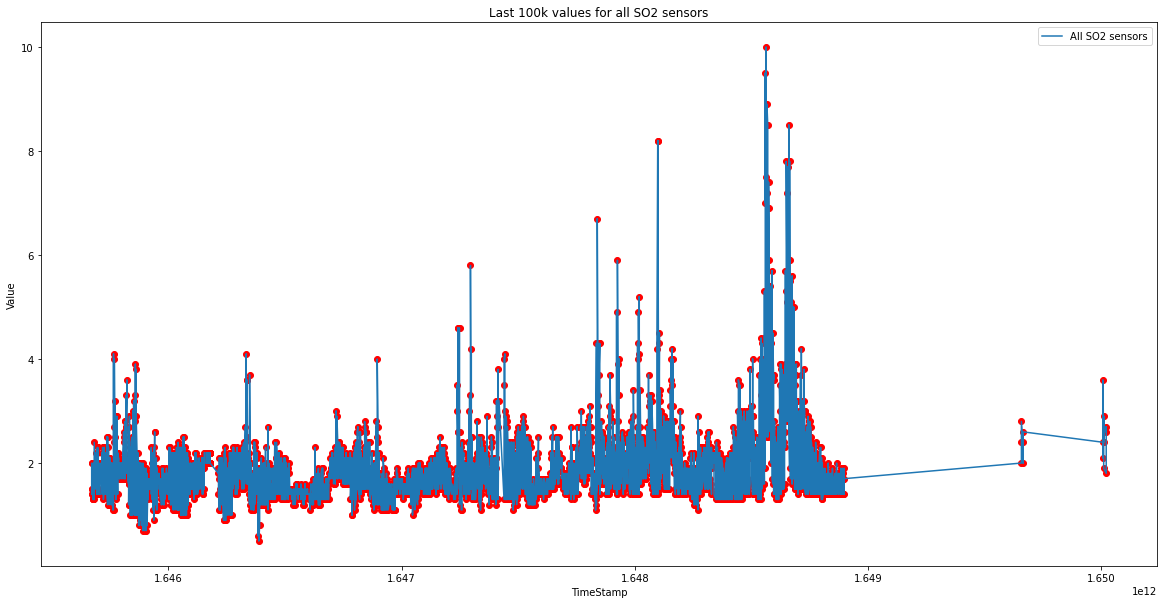

In [57]:
import matplotlib.pyplot as plt
plt.close("all")
# fig = plt.figure(figsize=(20,10), frameon=True)
plt.figure(figsize=(20,10))
plt.plot(so2.get('_source.TimeStamp'), so2.get('_source.Value'), label="All SO2 sensors")
plt.scatter(so2.get('_source.TimeStamp'), so2.get('_source.Value'), color = "red")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 100k values for all SO2 sensors")
plt.legend()
plt.savefig('plots_updated/SO2.jpg', bbox_inches = 'tight')
plt.show()

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [59]:
X = so2[["_source.TimeStamp"]].values
y = so2[["_source.Value"]].values

In [60]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [61]:
y_pred = regressor.predict(X)

In [62]:
print("Slope: ", float(regressor.coef_))
print("Intercept: ", float(regressor.intercept_))
# float("{:.8f}".format(float(regressor.intercept_)))

Slope:  2.573962916713436e-10
Intercept:  -422.07075962141136


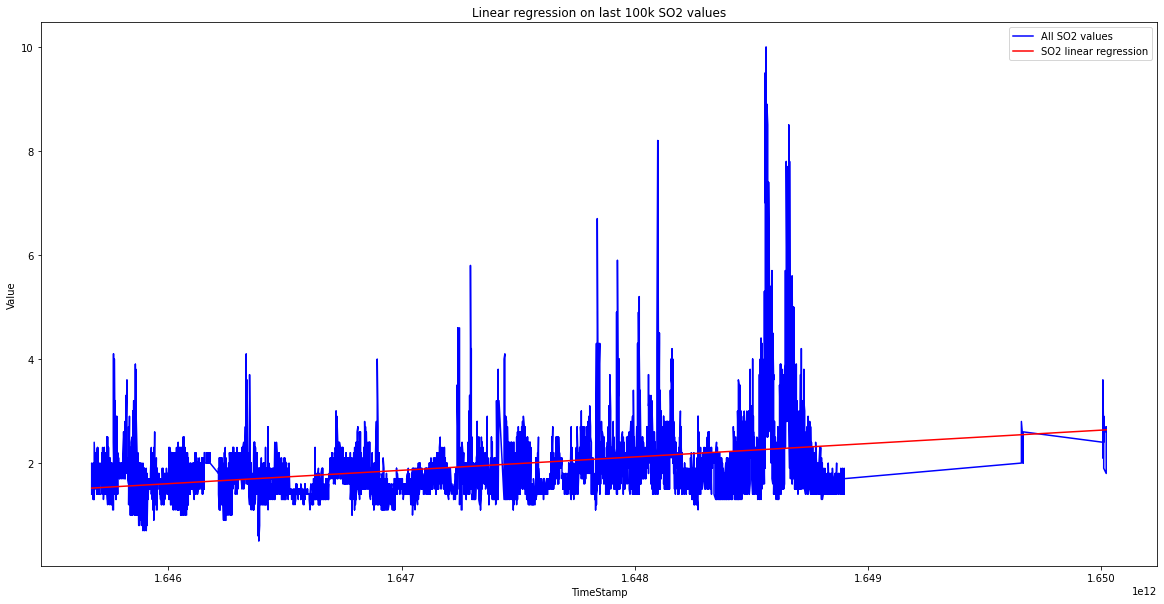

In [63]:
plt.figure(figsize=(20,10))
# plt.scatter(X, y, color = 'blue')
plt.plot(X,y, color = 'blue', label="All SO2 values")
plt.plot(X, regressor.predict(X), color = 'red', label="SO2 linear regression")
plt.title('Linear regression on last 100k SO2 values')
plt.xlabel('TimeStamp')
plt.ylabel('Value')
plt.legend()
plt.savefig('plots_updated/SO2_regression.jpg', bbox_inches = 'tight')
plt.show()

In [64]:
so2.head(6) #Vlahuta1, Centru4, Sanpetru2

,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
1,Waqi,so2,2.6,45.654271,25.624061,1650020400000,µg/m3,712783320.0,Vlahuta1
6,Waqi,so2,2.7,45.716700,25.633300,1650020400000,µg/m3,713500000.0,Sanpetru2
11,Waqi,so2,1.8,45.649117,25.604136,1650020400000,µg/m3,712532529.0,Patria
100,Waqi,so2,1.9,45.649117,25.604136,1650009600000,µg/m3,712532529.0,Patria
106,Waqi,so2,2.9,45.716700,25.633300,1650009600000,µg/m3,713500000.0,Sanpetru2
113,Waqi,so2,2.4,45.654271,25.624061,1650009600000,µg/m3,712783320.0,Vlahuta1


In [65]:
so2_vlahuta1 = so2[so2.get('LocationName') == 'Vlahuta1']
so2_patria = so2[so2.get('LocationName') == 'Patria']
so2_sanpetru2 = so2[so2.get('LocationName') == 'Sanpetru2']

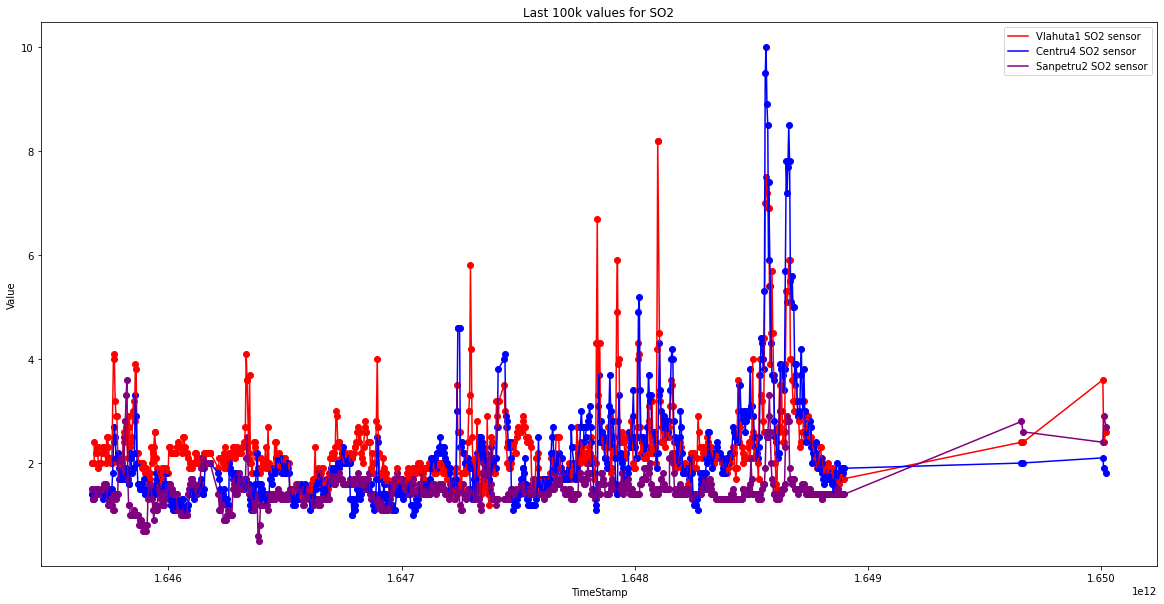

In [66]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(so2_vlahuta1.get('_source.TimeStamp'), so2_vlahuta1.get('_source.Value'), color = "red", label="Vlahuta1 SO2 sensor")
plt.scatter(so2_vlahuta1.get('_source.TimeStamp'), so2_vlahuta1.get('_source.Value'), color = "red")
plt.plot(so2_patria.get('_source.TimeStamp'), so2_patria.get('_source.Value'), color = "blue", label="Centru4 SO2 sensor")
plt.scatter(so2_patria.get('_source.TimeStamp'), so2_patria.get('_source.Value'), color = "blue")
plt.plot(so2_sanpetru2.get('_source.TimeStamp'), so2_sanpetru2.get('_source.Value'), color = "purple", label="Sanpetru2 SO2 sensor")
plt.scatter(so2_sanpetru2.get('_source.TimeStamp'), so2_sanpetru2.get('_source.Value'), color = "purple")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 100k values for SO2")
plt.legend()
plt.savefig('plots_updated/SO2_all.jpg', bbox_inches = 'tight')
plt.show()

In [67]:
pm10_carierei = pm10[pm10.get('LocationName') == 'Carierei']
pm10_brintex = pm10[pm10.get('LocationName') == 'Brintex']
pm10_avantgarden = pm10[pm10.get('LocationName') == 'Avantgarden']

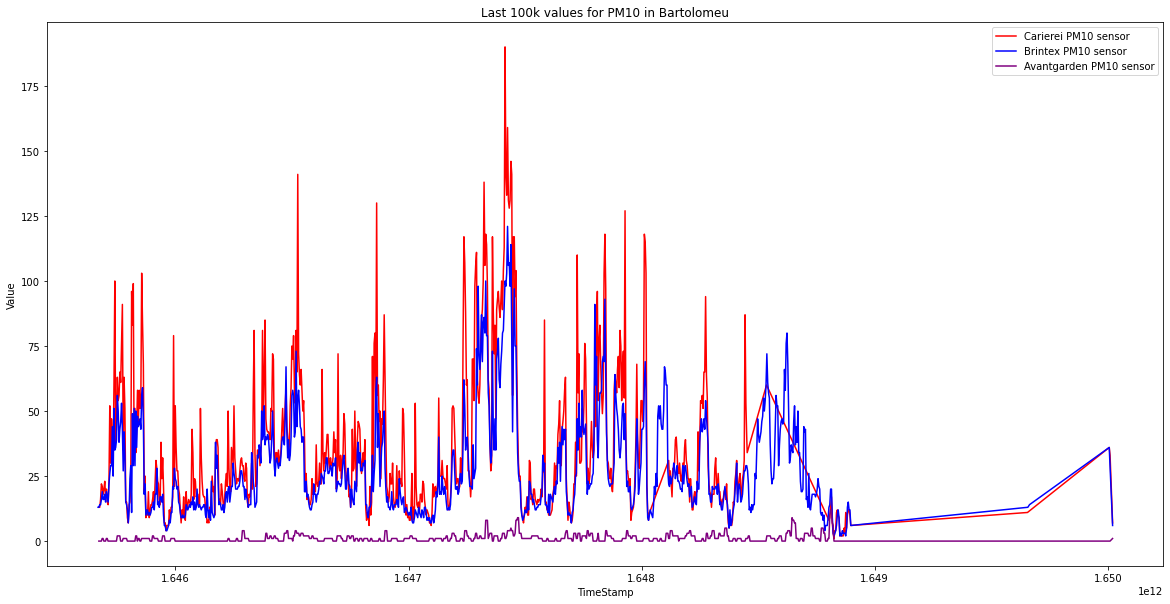

In [68]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(pm10_carierei.get('_source.TimeStamp'), pm10_carierei.get('_source.Value'), color = "red", label="Carierei PM10 sensor")
plt.plot(pm10_brintex.get('_source.TimeStamp'), pm10_brintex.get('_source.Value'), color = "blue", label="Brintex PM10 sensor")
plt.plot(pm10_avantgarden.get('_source.TimeStamp'), pm10_avantgarden.get('_source.Value'), color = "purple", label="Avantgarden PM10 sensor")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 100k values for PM10 in Bartolomeu")
plt.legend()
plt.savefig('plots_updated/PM10_Bartolomeu.jpg', bbox_inches = 'tight')
plt.show()

In [69]:
pm10_centru = pm10[pm10.get('LocationName') == 'Centru']
pm10_cetatuie = pm10[pm10.get('LocationName') == 'Cetatuie']
pm10_basarab = pm10[pm10.get('LocationName') == 'Basarab']
pm10_patria = pm10[pm10.get('LocationName') == 'Patria']

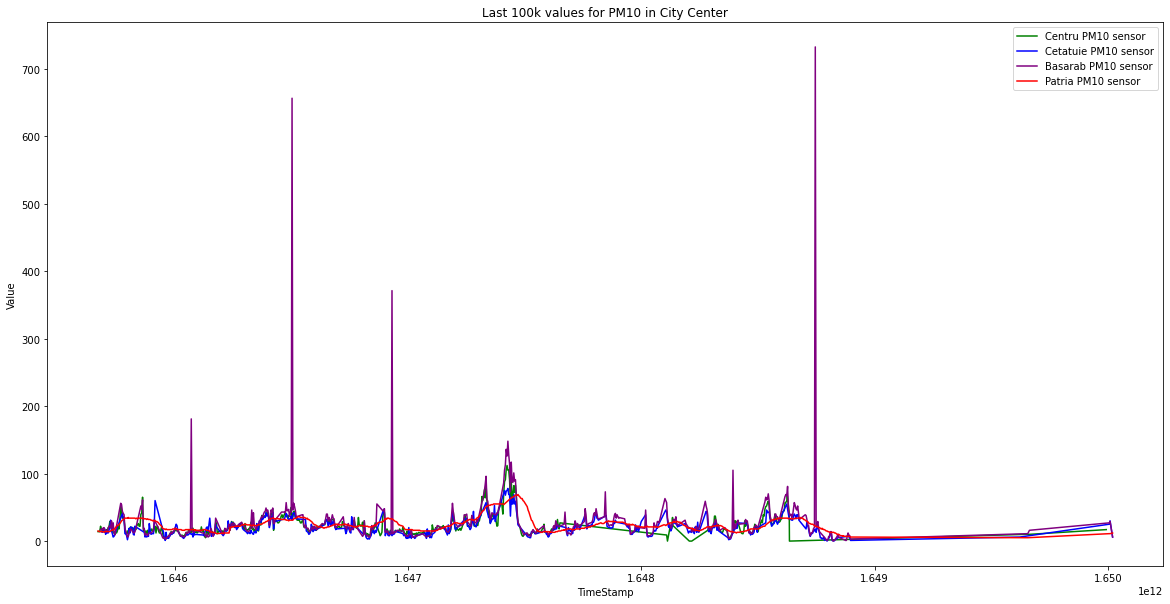

In [70]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(pm10_centru.get('_source.TimeStamp'), pm10_centru.get('_source.Value'), color = "green", label="Centru PM10 sensor")
plt.plot(pm10_cetatuie.get('_source.TimeStamp'), pm10_cetatuie.get('_source.Value'), color = "blue", label="Cetatuie PM10 sensor")
plt.plot(pm10_basarab.get('_source.TimeStamp'), pm10_basarab.get('_source.Value'), color = "purple", label="Basarab PM10 sensor")
plt.plot(pm10_patria.get('_source.TimeStamp'), pm10_patria.get('_source.Value'), color = "red", label="Patria PM10 sensor")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 100k values for PM10 in City Center")
plt.legend()
plt.savefig('plots_updated/PM10_Centru.jpg', bbox_inches = 'tight')
plt.show()

In [71]:
pm10_carrefour = pm10[pm10.get('LocationName') == 'Carrefour']
pm10_toamnei = pm10[pm10.get('LocationName') == 'Toamnei']
pm10_gara = pm10[pm10.get('LocationName') == 'Gara']

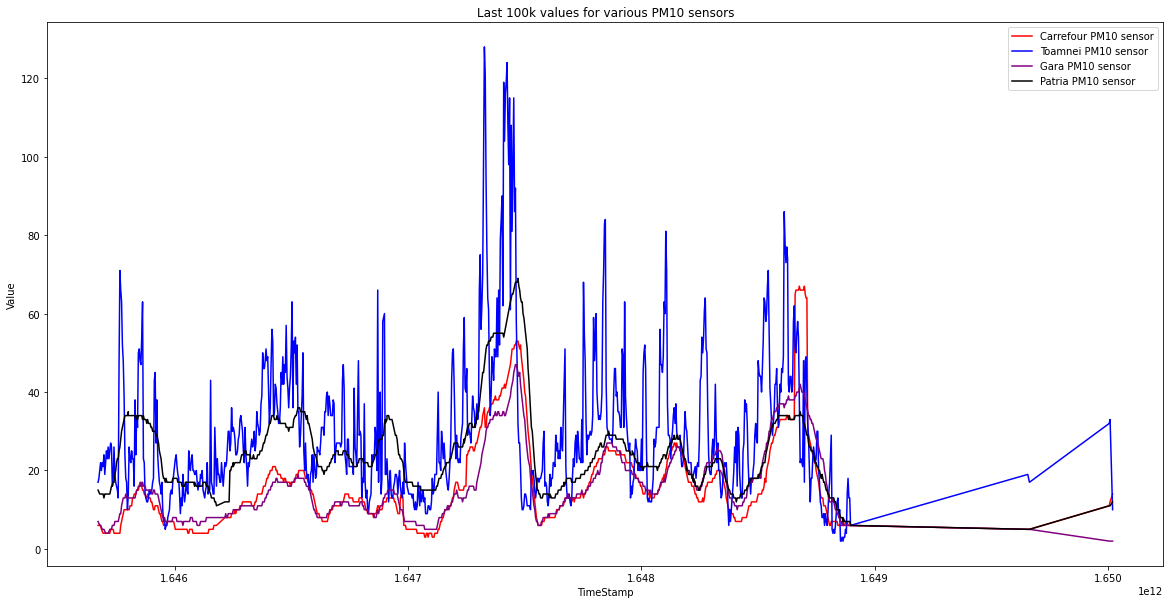

In [72]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(pm10_carrefour.get('_source.TimeStamp'), pm10_carrefour.get('_source.Value'), color = "red", label="Carrefour PM10 sensor")
plt.plot(pm10_toamnei.get('_source.TimeStamp'), pm10_toamnei.get('_source.Value'), color = "blue", label="Toamnei PM10 sensor")
plt.plot(pm10_gara.get('_source.TimeStamp'), pm10_gara.get('_source.Value'), color = "purple", label="Gara PM10 sensor")
plt.plot(pm10_patria.get('_source.TimeStamp'), pm10_patria.get('_source.Value'), color = "black", label="Patria PM10 sensor")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 100k values for various PM10 sensors")
plt.legend()
plt.savefig('plots_updated/PM10_strange.jpg', bbox_inches = 'tight')
plt.show()

In [73]:
# pm10_afi.head(30)
pm10_toamnei.head(10)

,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
65,UradMonitor,pm10,10.0,45.651464,25.615426,1650020358000,µg/m3,712668900.0,Toamnei
161,UradMonitor,pm10,33.0,45.651464,25.615426,1650009558000,µg/m3,712668900.0,Toamnei
263,UradMonitor,pm10,32.0,45.651464,25.615426,1650005959000,µg/m3,712668900.0,Toamnei
340,UradMonitor,pm10,17.0,45.651464,25.615426,1649663987000,µg/m3,712668900.0,Toamnei
451,UradMonitor,pm10,19.0,45.651464,25.615426,1649656787000,µg/m3,712668900.0,Toamnei
581,UradMonitor,pm10,6.0,45.651464,25.615426,1648897180000,µg/m3,712668900.0,Toamnei
681,UradMonitor,pm10,13.0,45.651464,25.615426,1648893580000,µg/m3,712668900.0,Toamnei
784,UradMonitor,pm10,13.0,45.651464,25.615426,1648889980000,µg/m3,712668900.0,Toamnei
883,UradMonitor,pm10,18.0,45.651464,25.615426,1648886380000,µg/m3,712668900.0,Toamnei
990,UradMonitor,pm10,14.0,45.651464,25.615426,1648882780000,µg/m3,712668900.0,Toamnei


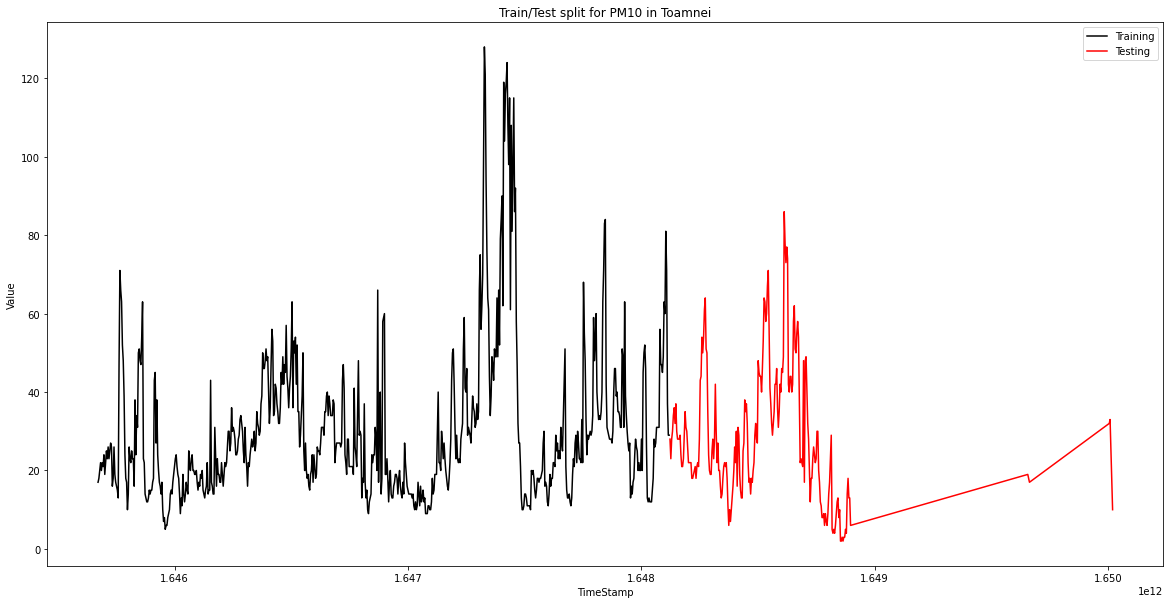

In [74]:
train = pm10_toamnei[pm10_toamnei.get('_source.TimeStamp') < 1648123156000]
test = pm10_toamnei[pm10_toamnei.get('_source.TimeStamp') >= 1648123156000]
# train = pm10_toamnei[pm10_toamnei.index < dataframe_size*(3/4)]
# test = pm10_toamnei[pm10_toamnei.index >= dataframe_size*(3/4)]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(train.get('_source.TimeStamp'), train.get('_source.Value'), color = "black", label = "Training")
plt.plot(test.get('_source.TimeStamp'), test.get('_source.Value'), color = "red", label = "Testing")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Train/Test split for PM10 in Toamnei")
plt.legend()
plt.savefig('plots_updated/PM10_Toamnei_Split.jpg', bbox_inches = 'tight')
plt.show()

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


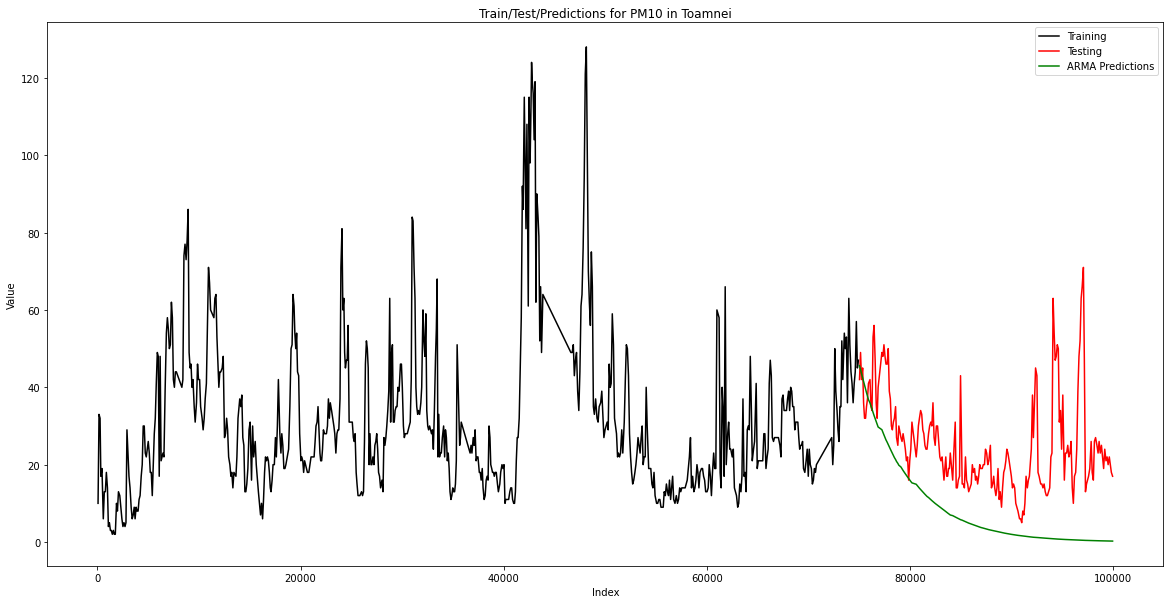

RMSE:  20.68448840967355


In [75]:
pm10_toamnei = pm10[pm10.get('LocationName') == 'Toamnei']
train = pm10_toamnei[pm10_toamnei.index < dataframe_size*(3/4)]
test = pm10_toamnei[pm10_toamnei.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
y = train['_source.Value']

ARMAmodel = SARIMAX(y, order=(1,0,1))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(train.index, train.get('_source.Value'), color = "black", label = "Training")
plt.plot(test.index, test.get('_source.Value'), color = "red", label = "Testing")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Train/Test/Predictions for PM10 in Toamnei")
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.legend()
plt.savefig('plots_updated/PM10_Toamnei_ARMA_Prediction.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["_source.Value"].values, y_pred_df["Predictions"]))
print("RMSE: ", arma_rmse)

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

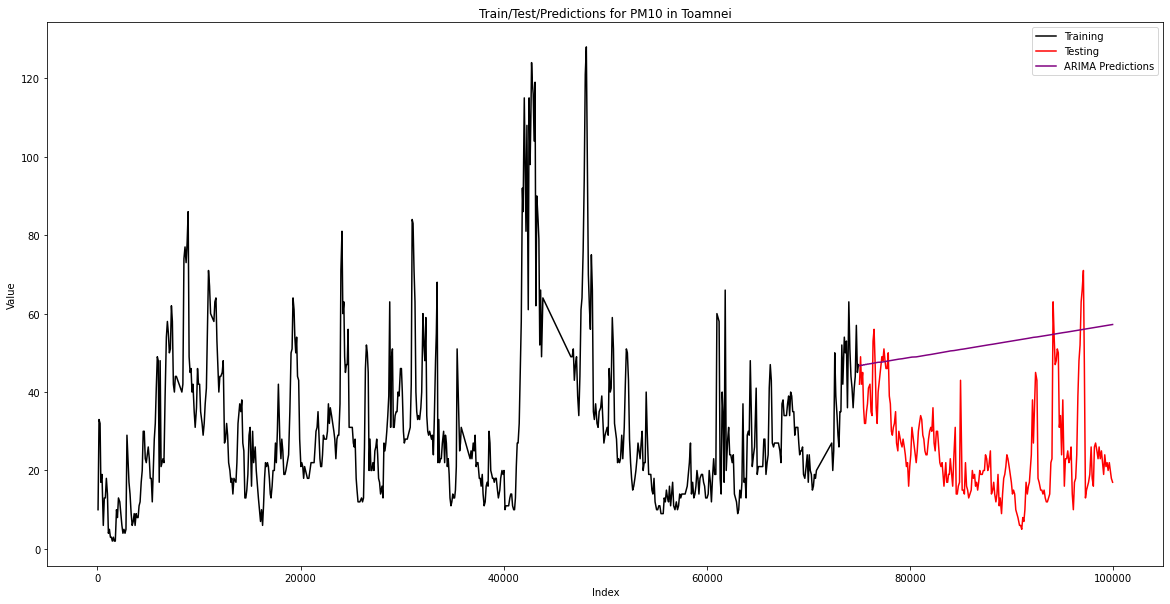

RMSE:  29.77255761329747


In [76]:
pm10_toamnei = pm10[pm10.get('LocationName') == 'Toamnei']
train = pm10_toamnei[pm10_toamnei.index < dataframe_size*(3/4)]
test = pm10_toamnei[pm10_toamnei.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['_source.Value']

ARMAmodel = ARIMA(y, order=(2,2,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(train.index, train.get('_source.Value'), color = "black", label = "Training")
plt.plot(test.index, test.get('_source.Value'), color = "red", label = "Testing")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Train/Test/Predictions for PM10 in Toamnei")
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions')
plt.legend()
plt.savefig('plots_updated/PM10_Toamnei_ARIMA_Prediction1.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse1 = np.sqrt(mean_squared_error(test["_source.Value"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse1)

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Predict

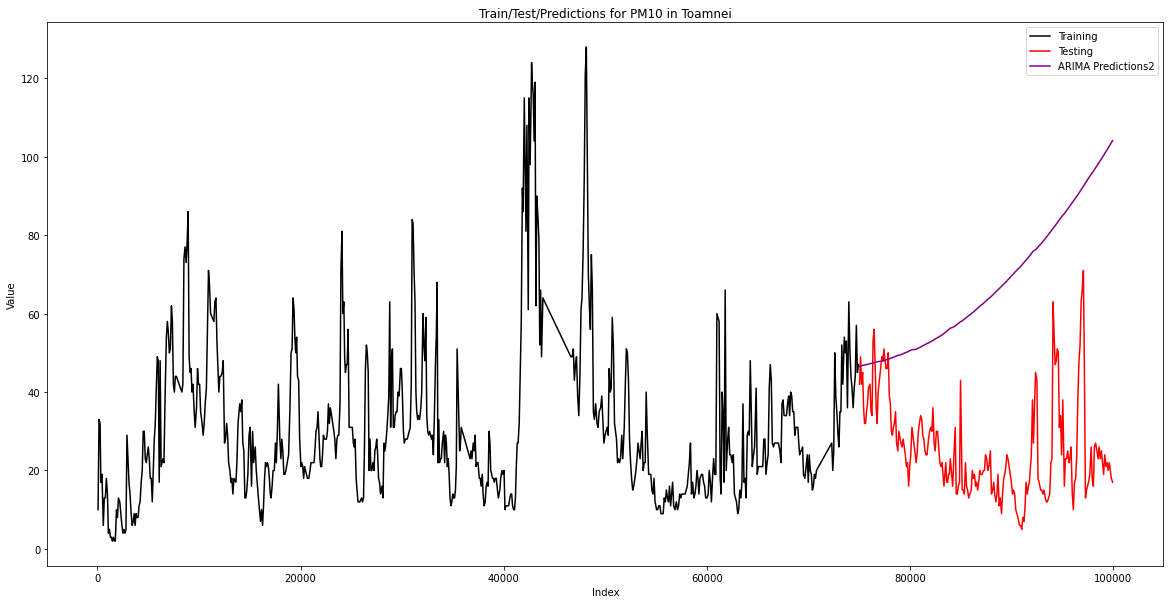

RMSE:  47.72686230978343


In [77]:
pm10_toamnei = pm10[pm10.get('LocationName') == 'Toamnei']
train = pm10_toamnei[pm10_toamnei.index < dataframe_size*(3/4)]
test = pm10_toamnei[pm10_toamnei.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['_source.Value']

ARMAmodel = ARIMA(y, order=(2,3,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(train.index, train.get('_source.Value'), color = "black", label = "Training")
plt.plot(test.index, test.get('_source.Value'), color = "red", label = "Testing")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Train/Test/Predictions for PM10 in Toamnei")
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions2')
plt.legend()
plt.savefig('plots_updated/PM10_Toamnei_ARIMA_Prediction2.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse2 = np.sqrt(mean_squared_error(test["_source.Value"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse2)

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to 

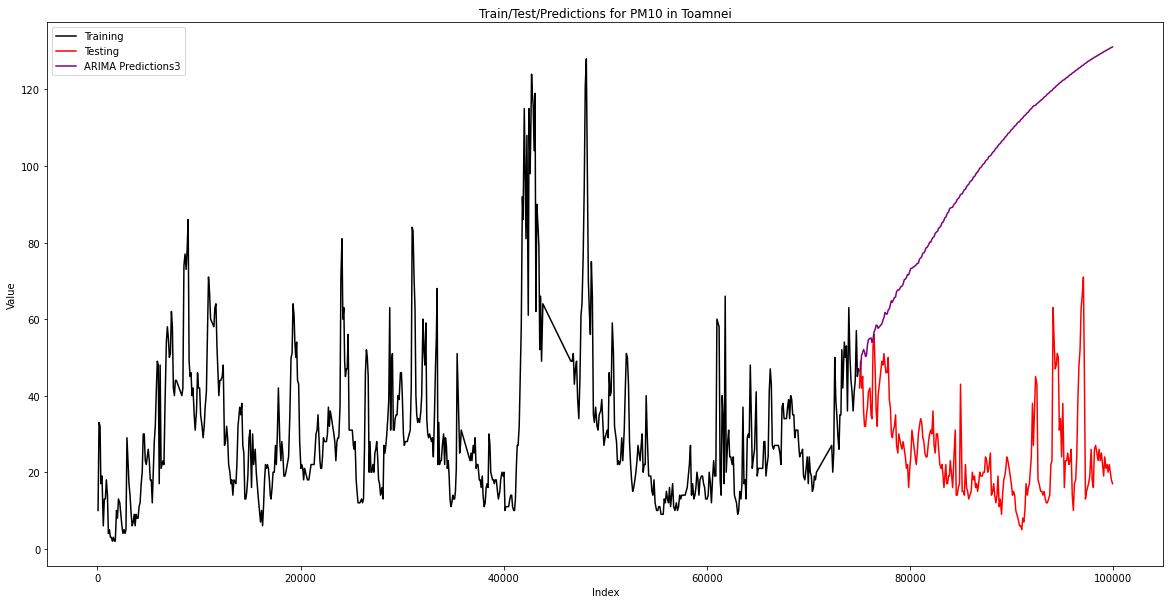

RMSE:  78.52465331614496


In [78]:
pm10_toamnei = pm10[pm10.get('LocationName') == 'Toamnei']
train = pm10_toamnei[pm10_toamnei.index < dataframe_size*(3/4)]
test = pm10_toamnei[pm10_toamnei.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['_source.Value']

ARMAmodel = ARIMA(y, order=(9,3,6))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(train.index, train.get('_source.Value'), color = "black", label = "Training")
plt.plot(test.index, test.get('_source.Value'), color = "red", label = "Testing")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Train/Test/Predictions for PM10 in Toamnei")
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions3')
plt.legend()
plt.savefig('plots_updated/PM10_Toamnei_ARIMA_Prediction3.jpg', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse3 = np.sqrt(mean_squared_error(test["_source.Value"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse3)

In [79]:
pm10_livada = pm10[pm10.get('LocationName') == 'Livada']
pm10_zarnesti = pm10[pm10.get('LocationName') == 'Zarnesti']
pm10_saguna = pm10[pm10.get('LocationName') == 'Saguna']

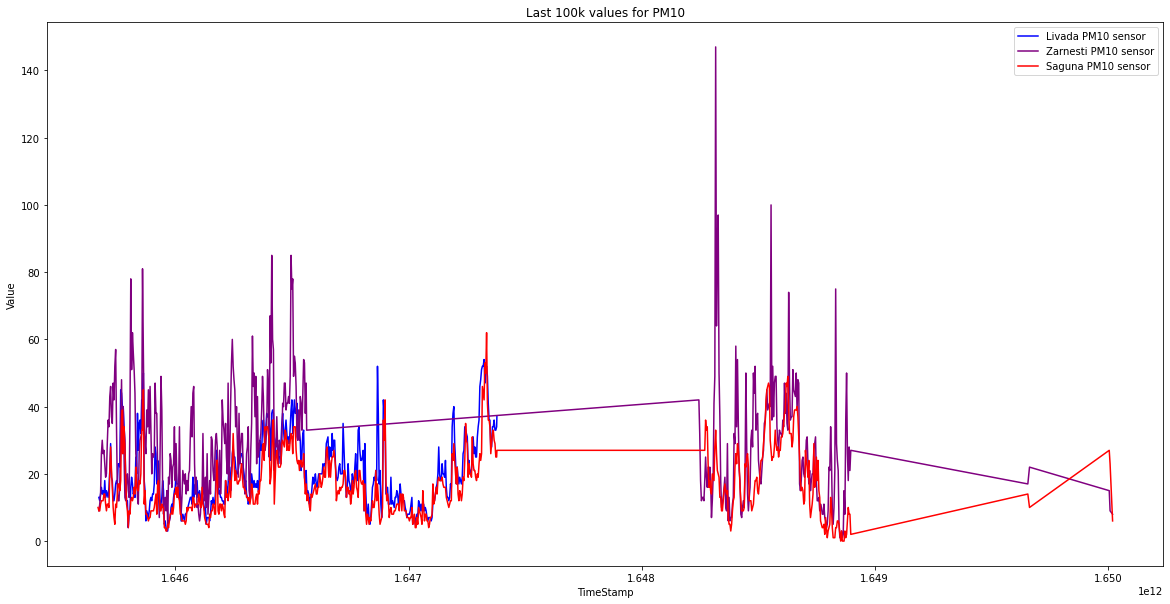

In [80]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(20,10))
plt.plot(pm10_livada.get('_source.TimeStamp'), pm10_livada.get('_source.Value'), color = "blue", label="Livada PM10 sensor")
plt.plot(pm10_zarnesti.get('_source.TimeStamp'), pm10_zarnesti.get('_source.Value'), color = "purple", label="Zarnesti PM10 sensor")
plt.plot(pm10_saguna.get('_source.TimeStamp'), pm10_saguna.get('_source.Value'), color = "red", label="Saguna PM10 sensor")
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 100k values for PM10")
plt.legend()
plt.savefig('plots_updated/PM10_Surprise.jpg', bbox_inches = 'tight')
plt.show()